In [1]:
#  schro_T - Program to solve the Schrodinger equation 
#  for a free particle using the Crank-Nicolson scheme
#  Tridiagonal matrix version

# Set up configuration options and special features
%pylab inline 

##############  NOT WORKING  ######################

Populating the interactive namespace from numpy and matplotlib


In [2]:
def tri_ge(a,b) :
    # Function to solve b = a*x by Gaussian elimination where
    # the matrix a is a packed tridiagonal matrix
    # Inputs
    #   a    Packed tridiagonal matrix, N by N unpacked
    #   b    Column vector of length N
    # Output 
    #   x    Solution of b = a*x; Column vector of length N

    #* Check that dimensions of a and b are compatible
    N_a = shape(a)
    N = len(b)
    if N_a[0] != N or N_a[1] != 3 :
        print 'Problem in tri_GE, inputs are incompatible'
        return None

    #* Unpack diagonals of triangular matrix into vectors
    alpha = empty(N-1,dtype=complex)
    beta = empty(N,dtype=complex)
    gamma = empty(N-1,dtype=complex)
    alpha = a[1:N,0]
    beta = a[:,1]
    gamma = a[0:(N-1),2]

    #* Perform forward elimination
    for i in range(1,N) :
        coeff = alpha[i-1]/beta[i-1]
        beta[i] = beta[i] - coeff*gamma[i-1]
        b[i] = b[i] - coeff*b[i-1]

    #* Perform back substitution
    x = empty(N,dtype=complex)
    x[-1] = b[-1]/beta[-1]
    for i in reversed(range(N-1)) :
        x[i] = (b[i] - gamma[i] * x[i+1])/beta[i]

    return x

In [3]:
#* Initialize parameters (grid spacing, time step, etc.)
i_imag = 1j             # Imaginary i
N = input('Enter number of grid points: ');
L = 100.                # System extends from -L/2 to L/2
h = L/(N-1)             # Grid size
x = arange(N)*h - L/2.  # Coordinates  of grid points
h_bar = 1.              # Natural units
mass = 1.               # Natural units
tau = input('Enter time step: ')

Enter number of grid points: 100
Enter time step: 1


In [4]:
#* Set up the Hamiltonian operator matrix
ham = zeros((N,3))     # Set all elements to zero
coeff = -h_bar**2/(2*mass*h**2)
for i in range(1,N-1) :
    ham[i,0] = coeff
    ham[i,1] = -2*coeff   # Set interior rows
    ham[i,2] = coeff

# First and last rows for periodic boundary conditions
ham[0,0] = 0.;   ham[0,1] = 0.;     ham[0,2] = 0.
ham[-1,0] = 0.;  ham[-1,1] = 0.;   ham[-1,2] = 0.

#* Compute the Q matrix
tri_eye = zeros((N,3))
tri_eye[:,1] = 1.
Q = 0.5 * (tri_eye + 0.5*i_imag*tau/h_bar*ham) 

In [5]:
#* Initialize the wavefunction 
x0 = 0.          # Location of the center of the wavepacket
velocity = 0.5   # Average velocity of the packet
k0 = mass*velocity/h_bar;       # Average wavenumber
sigma0 = L/10.   # Standard deviation of the wavefunction
Norm_psi = 1/(sqrt(sigma0*sqrt(pi)))   # Normalization
psi = empty(N,dtype=complex)
for i in range(N) :
    psi[i] = Norm_psi * exp(i_imag*k0*x[i]) * exp(-(x[i]-x0)**2/(2*sigma0**2))

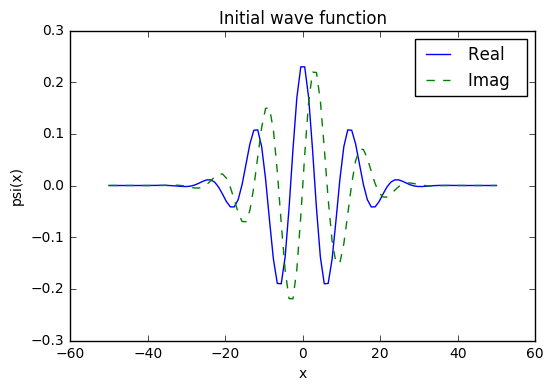

In [6]:
#* Plot the initial wavefunction
plot(x,real(psi),'-',x,imag(psi),'--')
xlabel('x');  ylabel('psi(x)')
legend(('Real  ','Imag  '))
title('Initial wave function')

In [7]:
#* Initialize loop and plot variables 
max_iter = int(L/(velocity*tau)+.5)       # Particle should circle system
plot_iter = max_iter/20                   # Produce 20 curves
p_plot = empty((N,max_iter+1))            # Note that P(x,t) is real
p_plot[:,0] = absolute(psi[:])**2         # Record initial condition
iplot = 0
axisV = [-L/2., L/2., 0., max(p_plot[:,0])]   # Fix axis min and max

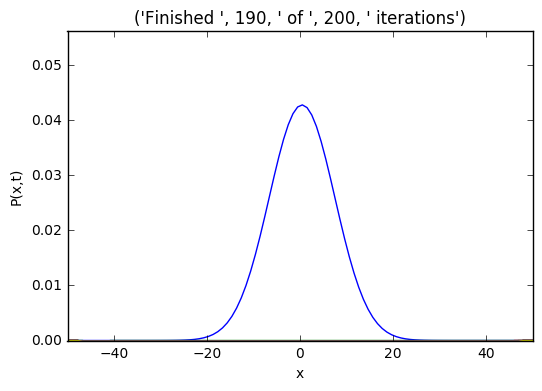

In [8]:
#* Loop over desired number of steps (wave circles system once)
for iter in range(max_iter) :

    #* Use Gaussian Elimination for the Crank-Nicolson scheme
    chi = tri_ge(Q,psi)
    psi = chi - psi 
  
    #* Periodically record values for plotting
    if iter % plot_iter < 1 :   
        iplot += 1
        p_plot[:,iplot] = absolute(psi[:])**2 
        plot(x,p_plot[:,iplot]);     # Display snap-shot of P(x)
        xlabel('x'); ylabel('P(x,t)')
        title(('Finished ', iter, ' of ', max_iter, ' iterations'))
        axis(axisV)

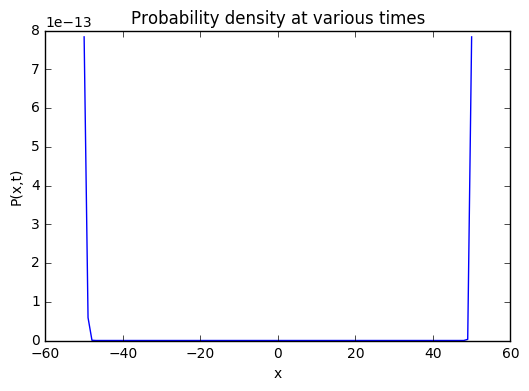

In [9]:
#* Plot probability versus position at various times
pFinal = empty(N)
pFinal = absolute(psi[:])**2
#plot(x,p_plot(:,1:3:iplot),x,pFinal)
plot(x,pFinal)
xlabel('x'); ylabel('P(x,t)')
title('Probability density at various times')